In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import datetime
import numpy as np
import pandas as pd
import os 
from pandas import ExcelFile
from keras import models 
from keras import layers
import tensorflow as tf
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #표준 정규화, 최대-최소 정규화


import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc


In [ ]:
pd.set_option('display.max_colwidth',-1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [ ]:
pd.set_option('display.float_format', '{:.4f}'.format)    #과학적 표기법 안쓸래 
mpl.rcParams['axes.unicode_minus'] = False               # 마이너스 표기 오류 방지 

In [ ]:
base_dir = "/content/gdrive/My Drive/Colab Notebooks/data"
train_file = "2019train.csv"
test_file = "2019test.csv"


train_dir = os.path.join(base_dir,train_file)
test_dir = os.path.join(base_dir,test_file)

In [ ]:
train_raw = pd.read_csv(train_dir, sep = "," , encoding = "cp949")   
test_raw = pd.read_csv(test_dir, sep = "," , encoding = "cp949")   

In [ ]:
train1 = train_raw
test1 = test_raw

In [ ]:
train1.info() # 92col , 32519 row

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32519 entries, 0 to 32518
Data columns (total 92 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    32519 non-null  int64  
 1   방송일시          32519 non-null  object 
 2   노출(분)         32519 non-null  float64
 3   마더코드          32519 non-null  float64
 4   상품코드          32519 non-null  float64
 5   상품명           32519 non-null  object 
 6   상품군           32519 non-null  object 
 7   판매단가          32519 non-null  float64
 8   취급액           32519 non-null  float64
 9   월             32519 non-null  int64  
 10  일             32519 non-null  int64  
 11  요일            32519 non-null  object 
 12  반기            32519 non-null  int64  
 13  분기            32519 non-null  object 
 14  365일          32519 non-null  int64  
 15  53주차          32519 non-null  int64  
 16  년월일           32519 non-null  object 
 17  시간            32519 non-null  object 
 18  시간hour        32519 non-nu

In [ ]:
train_y = pd.DataFrame(train1['취급액boxcox'])

train_X = train1.drop(['취급액','취급액boxcox','Unnamed: 0','마더코드','상품코드','요일','반기','분기','시간','시간hour','상품명' , '방송일시' , '방송끝나는시간', '시간' , '날짜', '날짜시간','취급액boxcox','브랜드','그룹코드'], axis=1)
train_X = train_X.drop(['최소판매수량','상품군','중분류','소분류','계절','상품명change'], axis=1)
train_X = train_X.drop(['년월일','365일','53주차','휴일','방송시간','sale단어','비눈여부','비눈여부_평균이상','월_COS','월_SIN'], axis=1)

In [ ]:
train_X =pd.get_dummies(train_X)

In [ ]:
train_X.info()  # 62 col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32519 entries, 0 to 32518
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   노출(분)         32519 non-null  float64
 1   판매단가          32519 non-null  float64
 2   월             32519 non-null  int64  
 3   일             32519 non-null  int64  
 4   168시간         32519 non-null  int64  
 5   매진여부          32519 non-null  int64  
 6   count         32519 non-null  int64  
 7   한달_상품군빈도      32519 non-null  float64
 8   한달_중분류빈도      32519 non-null  float64
 9   한달_소분류빈도      32519 non-null  float64
 10  한달_그룹코드빈도     32519 non-null  float64
 11  기온            32519 non-null  float64
 12  강수량           32519 non-null  float64
 13  풍속            32519 non-null  float64
 14  습도            32519 non-null  float64
 15  적설            32519 non-null  float64
 16  전운량           32519 non-null  float64
 17  미세먼지          32519 non-null  float64
 18  초미세먼지         32519 non-nu

In [ ]:
train_data = train_X
train_targets = train_y

In [ ]:
test_y = pd.DataFrame(test1['취급액boxcox'])

test_X = test1.drop(['취급액','취급액boxcox','Unnamed: 0','마더코드','상품코드','요일','반기','분기','시간','시간hour','상품명' , '방송일시' , '방송끝나는시간', '시간' , '날짜', '날짜시간','취급액boxcox','브랜드','그룹코드'], axis=1)
test_X = test_X.drop(['최소판매수량','상품군','중분류','소분류','계절','상품명change'], axis=1)
test_X = test_X.drop(['년월일','365일','53주차','휴일','방송시간','sale단어','비눈여부','비눈여부_평균이상','월_COS','월_SIN'], axis=1)

In [ ]:
test_X =pd.get_dummies(test_X)

In [ ]:
test_X.info()  # 62col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2860 entries, 0 to 2859
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   노출(분)         2860 non-null   float64
 1   판매단가          2860 non-null   float64
 2   월             2860 non-null   int64  
 3   일             2860 non-null   int64  
 4   168시간         2860 non-null   int64  
 5   매진여부          2860 non-null   int64  
 6   count         2860 non-null   int64  
 7   한달_상품군빈도      2860 non-null   float64
 8   한달_중분류빈도      2860 non-null   float64
 9   한달_소분류빈도      2860 non-null   float64
 10  한달_그룹코드빈도     2860 non-null   float64
 11  기온            2860 non-null   float64
 12  강수량           2860 non-null   float64
 13  풍속            2860 non-null   float64
 14  습도            2860 non-null   float64
 15  적설            2860 non-null   int64  
 16  전운량           2860 non-null   float64
 17  미세먼지          2860 non-null   float64
 18  초미세먼지         2860 non-null 

In [ ]:
test_data = test_X
test_targets = test_y

# scaling


In [ ]:
# # min max scaler 

# mm_scaler = MinMaxScaler()

# train_data_scaled = mm_scaler.fit_transform(train_data)
# test_data_scaled = mm_scaler.transform(test_data)

# train_data = train_data_scaled
# test_data = test_data_scaled

In [ ]:
## 정규화  : test도 train의 평균, 표준편차 값으로 정규화를 한다 ##
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow import nn
from tensorflow.keras.backend import shape
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input, Dense, Flatten, Activation
from tensorflow.keras.models import Model, Sequential, load_model
from keras.layers import BatchNormalization
from tensorflow.keras.utils import get_custom_objects
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import plot_model


def Mish(x):
    return x * K.tanh(K.softplus(x))

get_custom_objects().update({'mish': Mish})

In [ ]:
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(32, activation='mish',
                           input_shape=(train_data.shape[1],)))  # train data 의 col 수만큼 입력 
    
    model.add(BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(BatchNormalization())
    model.add(layers.Dense(32, activation='relu'))
    model.add(Dropout(0.5))

    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mape', metrics=['mae'])   # 3. 모델 학습과정 설정하기
    return model

In [ ]:
k = 4          ## k - fold  횟수

num_val_samples = len(train_data) // k
num_epochs = 1000
BATCH_SIZE = 32
all_scores = []
all_mape_histories=[]


for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]  # 검증 데이터 준비: k번째 분할
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(  # 훈련 데이터 준비: 다른 분할 전체
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

model = build_model()  # 케라스 모델 구성(컴파일 포함)



filename = 'checkpoint-epoch-{}-batch-{}-trial-001.h5'.format(num_epochs, BATCH_SIZE)
checkpoint = ModelCheckpoint(filename,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=100,         # N회 Epoch동안 개선되지 않는다면 종료
                             )

hist = model.fit(train_data, train_targets, 
      validation_data=(val_data, val_targets),
      epochs=num_epochs, 
      batch_size=BATCH_SIZE, 
      callbacks=[checkpoint, earlystopping], # checkpoint, earlystopping 콜백
     )


val_mape, val_mae = model.evaluate(val_data, val_targets, verbose=1)
all_scores.append(val_mape)

# 나중을 위해서 모형 저장해두기
model.save("d.h5")
print("Saved model to disk.")

mape_history = hist.history['val_loss']
all_mape_histories.append(mape_history)  

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3
Epoch 1/1000
1007/1017 [============================>.] - ETA: 0s - loss: 41.0323 - mae: 74.9330
Epoch 00001: val_loss improved from inf to 13.84829, saving model to checkpoint-epoch-1000-batch-32-trial-001.h5
1017/1017 [==============================] - 4s 4ms/step - loss: 40.8461 - mae: 74.5918 - val_loss: 13.8483 - val_mae: 26.9578
Epoch 2/1000
1009/1017 [============================>.] - ETA: 0s - loss: 20.9165 - mae: 37.0466
Epoch 00002: val_loss improved from 13.84829 to 9.43797, saving model to checkpoint-epoch-1000-batch-32-trial-001.h5
1017/1017 [==============================] - 4s 4ms/step - loss: 20.9206 - mae: 37.0533 - val_loss: 9.4380 - val_mae: 17.2279
Epoch 3/1000
1004/1017 [============================>.] - ETA: 0s - loss: 19.8435 - mae: 34.8881
Epoch 00003: val_loss improved from 9.43797 to 9.17816, saving model to checkpoint-epoch-1000-batch-32-trial-001.h5
1017/1017 [==============================] - 4s 4ms/step - los

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                1984      
_________________________________________________________________
batch_normalization_6 (Batch (None, 32)                128       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 64)                256       
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)               

# Train 그래프


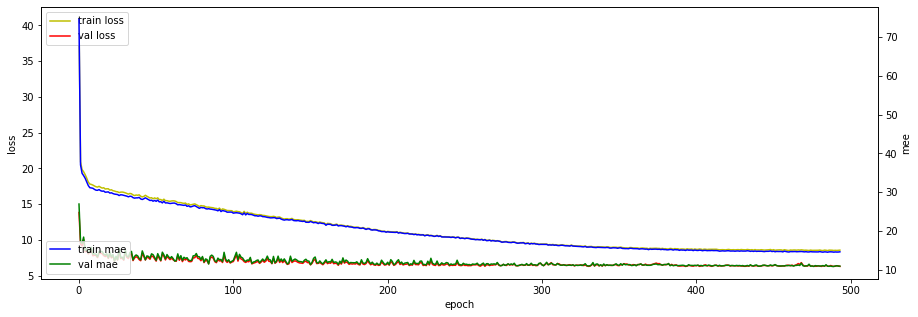

In [ ]:
fig, loss_ax = plt.subplots(figsize=(15, 5))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')   # 훈련데이터의 loss
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss') # 검증데이터의 loss 

acc_ax.plot(hist.history['mae'], 'b', label='train mae')   # 훈련데이터의 mae
acc_ax.plot(hist.history['val_mae'], 'g', label='val mae') # 검증데이터의 mae

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('mee')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

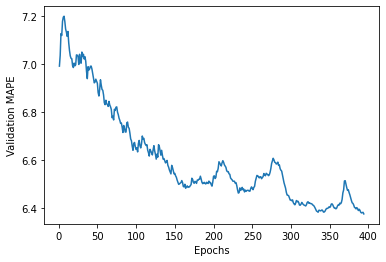

In [ ]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mape_history = smooth_curve(hist.history['val_loss'][100:])

plt.plot(range(1, len(smooth_mape_history) + 1), smooth_mape_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAPE')
plt.show()

# TEST

In [ ]:
# from tensorflow.keras.models import load_model

model = load_model('checkpoint-epoch-1000-batch-32-trial-001.h5', custom_objects={'Mish':Mish})
# model = load_model('d.h5', custom_objects={'Mish':Mish})

In [ ]:
test_mape_score, test_mae_score = model.evaluate(test_data, test_targets)


90/90 [==============================] - 0s 2ms/step - loss: 7.6442 - mean_absolute_error: 12.8044


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52712 missing from current font.
  font.set_

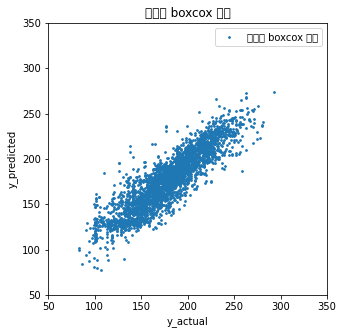

In [ ]:
import matplotlib.pyplot as plt

# test data에 대한 예측값
y_pred = model.predict(test_data)

plt.figure(figsize=(5,5))  # 그림 가로, 세로 크기
plt.scatter(test_targets, y_pred, label="취급액 boxcox 예측", s=3)  #test data의 실제 y값과 예측 y값을 입력
plt.title('취급액 boxcox 예측')
plt.xlabel('y_actual')   # X축 이름
plt.ylabel('y_predicted')# Y축 이름
plt.legend()
plt.xlim((50,350))  # X축 표시 범위
plt.ylim((50,350))  # Y축 표시 범위
plt.show()
# save_fig("prediction result")

# 취급액 BOXCOX를 다시 취급액으로 변환


In [ ]:
def original_target(boxcox):
    return (0.2222222 * boxcox +1)**(1/0.2222222)

In [ ]:
y_pred_original =original_target(y_pred)
test_y_original =original_target(test_y)

In [ ]:
y_pred_df = pd.DataFrame(y_pred_original)
test_y_df = pd.DataFrame(test_y_original)

In [ ]:
# col 이름 맞춰주기 
y_pred_df.columns = ['취급액']
test_y_df.columns = ['취급액']



# 취급액으로 변환한 MAPE


In [ ]:
real_MAPE = ((abs(test_y_df - y_pred_df)/test_y_df).sum())/len(test_y_df)*100

print(real_MAPE)

취급액   37.3367
dtype: float64


# 예측한 취급액 저장 


In [ ]:
base_dir_excel = "/content/gdrive/My Drive/Colab Notebooks/result/y_pred"
base_dir_model = "/content/gdrive/My Drive/Colab Notebooks/result/model"

In [ ]:
now = datetime.datetime.now()

In [ ]:
excel_nm = "{}_epoch_{}_batch_{}.xlsx".format(now,num_epochs,BATCH_SIZE)


In [ ]:
xlxs_dir = os.path.join(base_dir_excel, excel_nm) 

In [ ]:
# keras.models.save_model(model, base_dir_model, overwrite=True, include_optimizer=True)
models.save_model(model, base_dir_model, overwrite=True, include_optimizer=True)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Colab Notebooks/result/model/assets


In [ ]:
y_pred_df.to_excel(xlxs_dir, # directory and file name to write

            sheet_name = 'Sheet1', 
            na_rep = 'NaN', 
            float_format = "%.2f", 
            header = True, 
            #columns = ["group", "value_1", "value_2"], # if header is False
            index = True, 
            index_label = "id", 
            startrow = 1, 
            startcol = 1, 
            #engine = 'xlsxwriter', 
            freeze_panes = (2, 0)
            ) 


# 모델 로컬에 저장하기

In [ ]:
# Save model with json format 
model_json = model.to_json() 
with open("DNN_saved_model.json", "w") as json_file: 
    json_file.write(model_json)
    
 # Save weight with h5 format 
model.save_weights("DNN_saved_model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:

from google.colab import files
files.download('DNN_saved_model.h5')
files.download("DNN_saved_model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.compat.v2.keras.models import model_from_json # model.json 파일 열기 

json_file = open("DNN_saved_model.json", "r") 
loaded_model_json = json_file.read() 

json_file.close() 

# json파일로부터 model 로드하기 
loaded_model = model_from_json(loaded_model_json,  custom_objects={'Mish':Mish} )

# 로드한 model에 weight 로드하기 
loaded_model.load_weights("DNN_saved_model.h5") 
print("Loaded model from disk")

Loaded model from disk


In [ ]:
loaded_model

In [ ]:

loaded_model.compile(optimizer = 'rmsprop', loss = 'mape', metrics = ['mae'])

In [ ]:
test_mape_score, test_mae_score = loaded_model.evaluate(test_data, test_targets)

90/90 [==============================] - 0s 2ms/step - loss: 7.6442 - mae: 12.8044
